# A quick test of p-DTW

Let us start by defining useful bits...
NB: Time series are taken from 50words train set (UCR datasets).

In [1]:
%matplotlib inline
import numpy
import pylab
from matplotlib import cm

from py.p_dtw import p_dtw, p_dtw_backtrace

s_x = numpy.array(
    [-0.790, -0.765, -0.734, -0.700, -0.668, -0.639, -0.612, -0.587, -0.564, -0.544, -0.529, -0.518, -0.509, -0.502,
     -0.494, -0.488, -0.482, -0.475, -0.472, -0.470, -0.465, -0.464, -0.461, -0.458, -0.459, -0.460, -0.459, -0.458,
     -0.448, -0.431, -0.408, -0.375, -0.333, -0.277, -0.196, -0.090, 0.047, 0.220, 0.426, 0.671, 0.962, 1.300, 1.683,
     2.096, 2.510, 2.895, 3.219, 3.463, 3.621, 3.700, 3.713, 3.677, 3.606, 3.510, 3.400, 3.280, 3.158, 3.038, 2.919,
     2.801, 2.676, 2.538, 2.382, 2.206, 2.016, 1.821, 1.627, 1.439, 1.260, 1.085, 0.917, 0.758, 0.608, 0.476, 0.361,
     0.259, 0.173, 0.096, 0.027, -0.032, -0.087, -0.137, -0.179, -0.221, -0.260, -0.293, -0.328, -0.359, -0.385, -0.413,
     -0.437, -0.458, -0.480, -0.498, -0.512, -0.526, -0.536, -0.544, -0.552, -0.556, -0.561, -0.565, -0.568, -0.570,
     -0.570, -0.566, -0.560, -0.549, -0.532, -0.510, -0.480, -0.443, -0.402, -0.357, -0.308, -0.256, -0.200, -0.139,
     -0.073, -0.003, 0.066, 0.131, 0.186, 0.229, 0.259, 0.276, 0.280, 0.272, 0.256, 0.234, 0.209, 0.186, 0.162, 0.139,
     0.112, 0.081, 0.046, 0.008, -0.032, -0.071, -0.110, -0.147, -0.180, -0.210, -0.235, -0.256, -0.275, -0.292, -0.307,
     -0.320, -0.332, -0.344, -0.355, -0.363, -0.367, -0.364, -0.351, -0.330, -0.299, -0.260, -0.217, -0.172, -0.128,
     -0.091, -0.060, -0.036, -0.022, -0.016, -0.020, -0.037, -0.065, -0.104, -0.151, -0.201, -0.253, -0.302, -0.347,
     -0.388, -0.426, -0.460, -0.491, -0.517, -0.539, -0.558, -0.575, -0.588, -0.600, -0.606, -0.607, -0.604, -0.598,
     -0.589, -0.577, -0.558, -0.531, -0.496, -0.454, -0.410, -0.364, -0.318, -0.276, -0.237, -0.203, -0.176, -0.157,
     -0.145, -0.142, -0.145, -0.154, -0.168, -0.185, -0.206, -0.230, -0.256, -0.286, -0.318, -0.351, -0.383, -0.414,
     -0.442, -0.467, -0.489, -0.508, -0.523, -0.535, -0.544, -0.552, -0.557, -0.560, -0.560, -0.557, -0.551, -0.542,
     -0.531, -0.519, -0.507, -0.494, -0.484, -0.476, -0.469, -0.463, -0.456, -0.449, -0.442, -0.435, -0.431, -0.429,
     -0.430, -0.435, -0.442, -0.452, -0.465, -0.479, -0.493, -0.506, -0.517, -0.526, -0.535, -0.548, -0.567, -0.592,
     -0.622, -0.655, -0.690, -0.728, -0.764, -0.795, -0.815, -0.823, -0.821])
s_y = numpy.array(
    [-0.764, -0.744, -0.744, -0.721, -0.718, -0.703, -0.692, -0.681, -0.671, -0.684, -0.684, -0.701, -0.705, -0.688,
     -0.702, -0.695, -0.701, -0.740, -0.737, -0.731, -0.734, -0.714, -0.706, -0.734, -0.735, -0.758, -0.794, -0.807,
     -0.816, -0.791, -0.760, -0.710, -0.655, -0.602, -0.514, -0.456, -0.412, -0.407, -0.420, -0.423, -0.424, -0.392,
     -0.352, -0.349, -0.369, -0.379, -0.384, -0.384, -0.376, -0.376, -0.377, -0.375, -0.380, -0.391, -0.398, -0.402,
     -0.404, -0.403, -0.399, -0.403, -0.406, -0.395, -0.381, -0.365, -0.353, -0.342, -0.333, -0.315, -0.259, -0.107,
     0.258, 0.793, 1.266, 1.528, 1.629, 1.634, 1.527, 1.326, 1.116, 0.919, 0.715, 0.522, 0.360, 0.254, 0.195, 0.156,
     0.120, 0.097, 0.087, 0.095, 0.122, 0.159, 0.184, 0.179, 0.141, 0.090, 0.052, 0.032, 0.028, 0.014, -0.008, 0.007,
     0.079, 0.191, 0.332, 0.590, 1.181, 2.147, 3.101, 3.764, 4.136, 4.275, 4.278, 4.191, 4.006, 3.704, 3.342, 2.988,
     2.642, 2.336, 2.074, 1.856, 1.704, 1.585, 1.462, 1.361, 1.343, 1.406, 1.437, 1.333, 1.118, 0.885, 0.683, 0.507,
     0.331, 0.168, 0.043, -0.053, -0.126, -0.192, -0.257, -0.312, -0.374, -0.437, -0.497, -0.554, -0.598, -0.633,
     -0.662, -0.681, -0.681, -0.669, -0.648, -0.600, -0.461, -0.178, 0.191, 0.508, 0.695, 0.755, 0.734, 0.676, 0.604,
     0.539, 0.507, 0.530, 0.581, 0.584, 0.493, 0.331, 0.155, -0.011, -0.165, -0.304, -0.405, -0.472, -0.501, -0.487,
     -0.449, -0.407, -0.378, -0.356, -0.339, -0.340, -0.361, -0.393, -0.434, -0.477, -0.518, -0.558, -0.593, -0.629,
     -0.664, -0.687, -0.708, -0.727, -0.736, -0.733, -0.685, -0.515, -0.189, 0.162, 0.348, 0.378, 0.354, 0.285, 0.184,
     0.065, -0.064, -0.187, -0.299, -0.403, -0.496, -0.565, -0.608, -0.640, -0.674, -0.706, -0.734, -0.754, -0.776,
     -0.790, -0.795, -0.786, -0.737, -0.623, -0.420, -0.150, 0.087, 0.218, 0.247, 0.187, 0.053, -0.085, -0.185, -0.303,
     -0.444, -0.559, -0.635, -0.675, -0.681, -0.662, -0.642, -0.621, -0.597, -0.579, -0.567, -0.566, -0.579, -0.601,
     -0.622, -0.640, -0.650, -0.659, -0.668, -0.669, -0.662, -0.641, -0.612, -0.578, -0.528, -0.454, -0.365, -0.312,
     -0.337, -0.429, -0.535, -0.630, -0.711, -0.774])

First, let us have a look at considered time series:

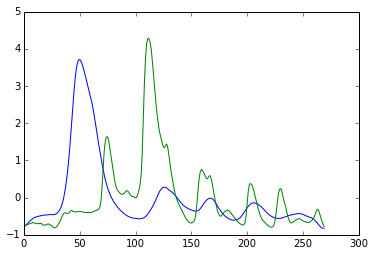

In [2]:
pylab.figure()
plt = pylab.plot(numpy.arange(s_x.shape[0]), s_x)
plt2 = pylab.plot(numpy.arange(s_y.shape[0]), s_y)

Then, we compute p-DTW for gamma=0 (i.e. standard DTW) and plot obtained path.

gamma=0.00, Cost: 42.02


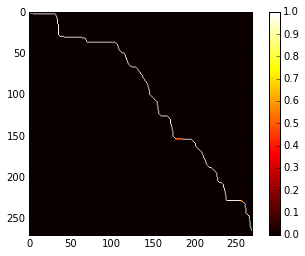

In [3]:
gamma = 0.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
m = p_dtw_backtrace(probas)
im = pylab.imshow(m, cmap=cm.hot)
_ = pylab.colorbar()

Finally, for growing gamma:

gamma=1.00, Cost: 81.75


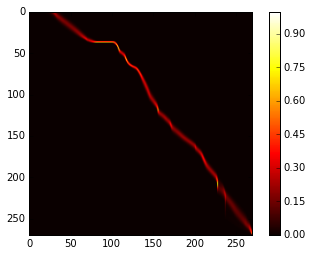

In [4]:
gamma = 1.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
m = p_dtw_backtrace(probas)
im = pylab.imshow(m, cmap=cm.hot)
_ = pylab.colorbar()

gamma=10.00, Cost: 189.17


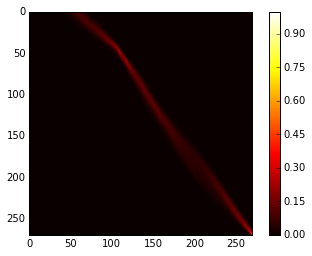

In [5]:
gamma = 10.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
m = p_dtw_backtrace(probas)
im = pylab.imshow(m, cmap=cm.hot)
_ = pylab.colorbar()

gamma=100.00, Cost: 332.02


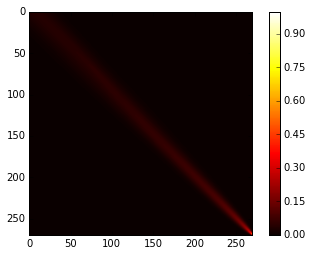

In [6]:
gamma = 100.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
m = p_dtw_backtrace(probas)
im = pylab.imshow(m, cmap=cm.hot)
_ = pylab.colorbar()

As can be seen, when gamma tends to infinity, diagonal cells are favored since when all paths are equiprobable, these are the cells with highest probability (as being part of many paths)